<a href="https://colab.research.google.com/github/karthisha-13/GENERATIVE-AI_2025/blob/main/2303A52099_Genrative_AI_Assignment_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to predict the housing price using Keras deep
learning library

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 24734370627584.0000 - mae: 4673477.5000 - val_loss: 30129975721984.0000 - val_mae: 5007535.0000
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 24992389529600.0000 - mae: 4703740.0000 - val_loss: 30129952653312.0000 - val_mae: 5007532.5000
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 25781898051584.0000 - mae: 4753973.5000 - val_loss: 30129896030208.0000 - val_mae: 5007528.0000
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 24783230074880.0000 - mae: 4651136.0000 - val_loss: 30129776492544.0000 - val_mae: 5007517.5000
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24048371236864.0000 - mae: 4602228.5000 - val_loss: 30129518542848.0000 - val_mae: 5007494.5000
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 23784142667776.0000 - mae: 4575311.5000 - val_loss: 30128983769088.0000 - val_mae: 5007445.5000
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2514

Training MAE: 702090.1875, Testing MAE: 1000019.0625


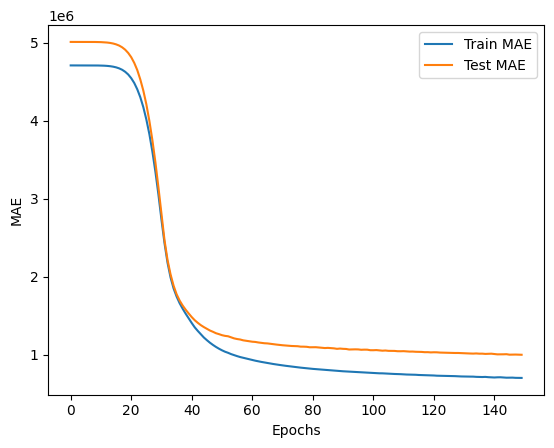

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

target_column = 'Price' if 'Price' in df.columns else 'price' if 'price' in df.columns else None
if target_column is None:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(15, activation='relu'),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

train_mae = model.evaluate(X_train, y_train, verbose=0)[1]
test_mae = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training MAE: {train_mae}, Testing MAE: {test_mae}')

model.save('housing_price_model.h5')

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])
    return loaded_model.predict(features)[0][0]